In [49]:
import pandas as pd

In [50]:
data = pd.read_csv(r'..\data\경기종합지수.csv')

In [51]:
df = data[['시점',' 선행종합지수(2020=100)']]

In [52]:
# '시점' 컬럼을 문자열로 변환 후 datetime 형식으로 변환
df['시점'] = pd.to_datetime(df['시점'].astype(str), format='%Y.%m')

C:\Users\user\AppData\Local\Temp\ipykernel_22172\1890156235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['시점'] = pd.to_datetime(df['시점'].astype(str), format='%Y.%m')


In [53]:
# '시점'을 년-월 형식으로 변환
df['시점'] = df['시점'].dt.strftime('%Y-%m')
df

C:\Users\user\AppData\Local\Temp\ipykernel_22172\265420599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['시점'] = df['시점'].dt.strftime('%Y-%m')


,시점,선행종합지수(2020=100)
0,2013-01,75.6
1,2013-02,75.8
2,2013-03,76.1
3,2013-04,76.3
4,2013-05,76.6
...,...,...
139,2024-08,116.2
140,2024-09,116.5
141,2024-01,116.8
142,2024-11,117.1


In [54]:
# '선행지수 전년동월대비증가율' 컬럼 생성
# ex) 2020년 1월의 선행지수 전년동월대비증가율 = (2020년 1월 선행종합지수 - 2019년 1월 선행종합지수) / 2019년 1월 선행종합지수 * 100
df['선행지수 전년동월대비증가율'] = df[' 선행종합지수(2020=100)'].pct_change(periods=12) * 100
df

C:\Users\user\AppData\Local\Temp\ipykernel_22172\4222982610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['선행지수 전년동월대비증가율'] = df[' 선행종합지수(2020=100)'].pct_change(periods=12) * 100


,시점,선행종합지수(2020=100),선행지수 전년동월대비증가율
0,2013-01,75.6,NaN
1,2013-02,75.8,NaN
2,2013-03,76.1,NaN
3,2013-04,76.3,NaN
4,2013-05,76.6,NaN
...,...,...,...
139,2024-08,116.2,4.215247
140,2024-09,116.5,4.203936
141,2024-01,116.8,4.007124
142,2024-11,117.1,3.812057


In [55]:
# 더미변수 생성
# '선행지수 전년동월대비증가율' 이 전년 '선행지수 전년동월대비증가율' 보다 높으면 1, 낮으면 0
df['선행지수 더미'] = (df['선행지수 전년동월대비증가율'] > df['선행지수 전년동월대비증가율'].shift(12)).astype(int)
df

C:\Users\user\AppData\Local\Temp\ipykernel_22172\2131319087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['선행지수 더미'] = (df['선행지수 전년동월대비증가율'] > df['선행지수 전년동월대비증가율'].shift(12)).astype(int)


,시점,선행종합지수(2020=100),선행지수 전년동월대비증가율,선행지수 더미
0,2013-01,75.6,NaN,0
1,2013-02,75.8,NaN,0
2,2013-03,76.1,NaN,0
3,2013-04,76.3,NaN,0
4,2013-05,76.6,NaN,0
...,...,...,...,...
139,2024-08,116.2,4.215247,1
140,2024-09,116.5,4.203936,1
141,2024-01,116.8,4.007124,1
142,2024-11,117.1,3.812057,1


Text(0.5, 1.0, '선행지수 더미')

c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\

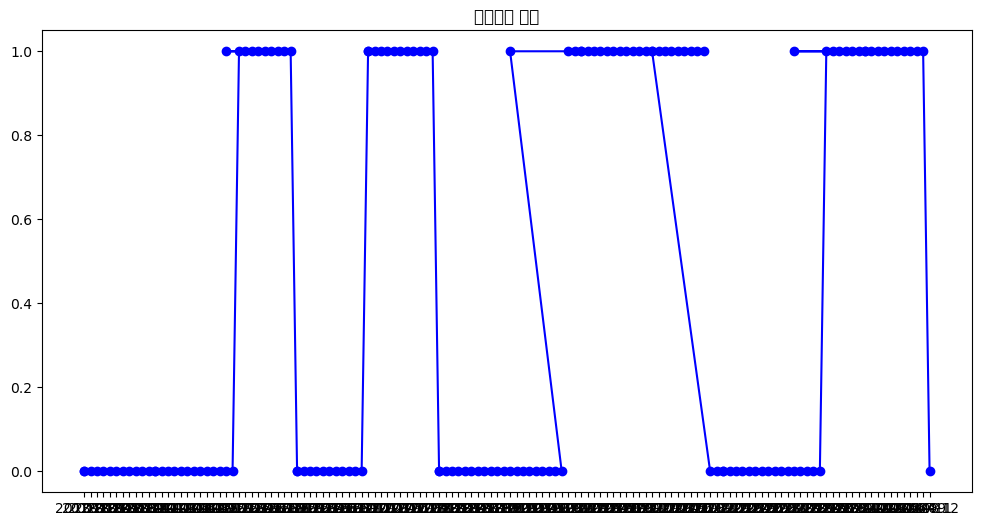

In [56]:
# 선행지수 더미 그래프로 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['시점'], df['선행지수 더미'], marker='o', linestyle='-', color='blue')
plt.title('선행지수 더미')

C:\Users\user\AppData\Local\Temp\ipykernel_22172\2847583761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['시점'] = pd.to_datetime(df2['시점'].astype(str), format='%Y.%m')
C:\Users\user\AppData\Local\Temp\ipykernel_22172\2847583761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['시점'] = df2['시점'].dt.strftime('%Y-%m')
C:\Users\user\AppData\Local\Temp\ipykernel_22172\2847583761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Text(0.5, 1.0, '동행지수 더미')

c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\

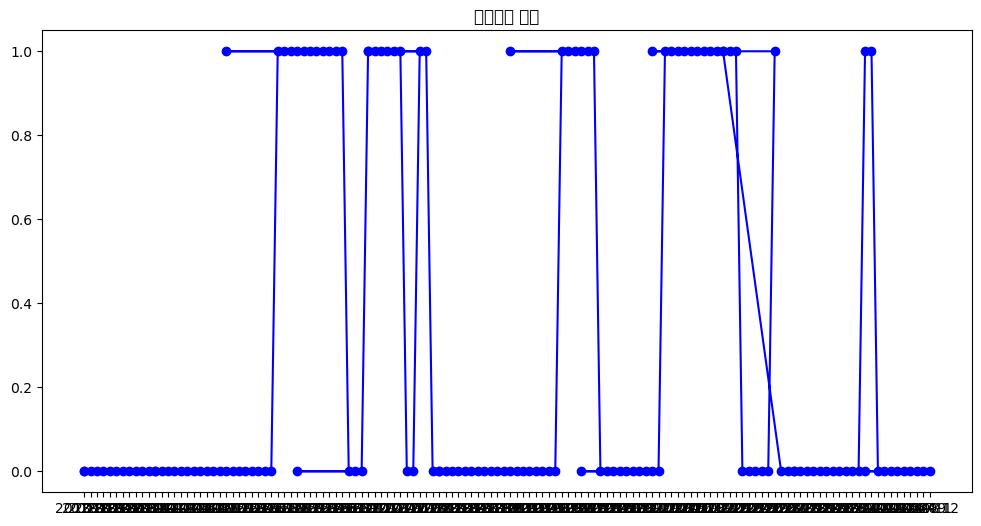

In [57]:
df2 = data[['시점',' 동행종합지수(2020=100)']]
df2['시점'] = pd.to_datetime(df2['시점'].astype(str), format='%Y.%m')
df2['시점'] = df2['시점'].dt.strftime('%Y-%m')
df2['동행지수 전년동월대비증가율'] = df2[' 동행종합지수(2020=100)'].pct_change(periods=12) * 100
df2['동행지수 더미'] = (df2['동행지수 전년동월대비증가율'] > df2['동행지수 전년동월대비증가율'].shift(12)).astype(int)
plt.figure(figsize=(12, 6))
plt.plot(df2['시점'], df2['동행지수 더미'], marker='o', linestyle='-', color='blue')
plt.title('동행지수 더미')

In [62]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\user\AppData\Local\Temp\ipykernel_22172\752650839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['더미_스무딩'] = df2['동행지수 더미'].rolling(window=rolling_window).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_22172\752650839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['동행지수 더미 확정'] = (df2['더미_스무딩'] >= 0.5).astype(int)


([<matplotlib.axis.XTick at 0x23bf9f0f740>,
 [Text(0, 0, '2013-01'),
  Text(12, 0, '2014-01'),
  Text(24, 0, '2015-01'),
  Text(36, 0, '2016-01'),
  Text(48, 0, '2017-01'),
  Text(60, 0, '2018-01'),
  Text(72, 0, '2019-01'),
  Text(84, 0, '2020-01'),
  Text(96, 0, '2021-01'),
  Text(108, 0, '2022-01'),
  Text(120, 0, '2023-01'),
  Text(132, 0, '2024-01')])

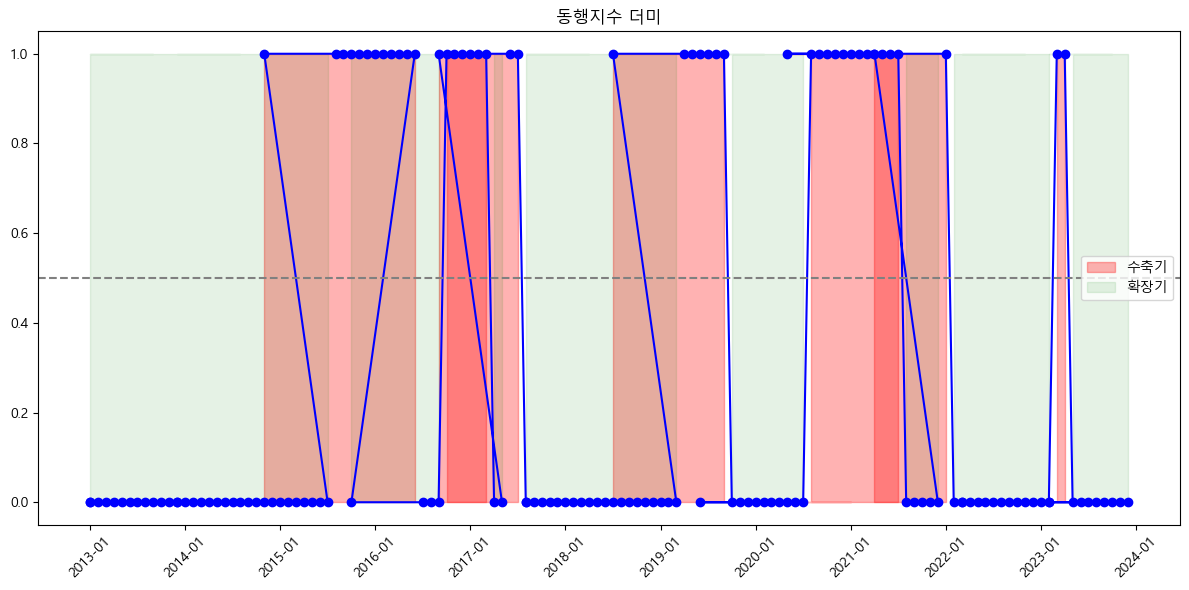

In [63]:
# 국면 전환 최소 지속 조건 적용 (rolling window 방식)
rolling_window = 3
df2['더미_스무딩'] = df2['동행지수 더미'].rolling(window=rolling_window).mean()
df2['동행지수 더미 확정'] = (df2['더미_스무딩'] >= 0.5).astype(int)

plt.figure(figsize=(12, 6))

plt.plot(df2['시점'], df2['동행지수 더미 확정'], marker='o', linestyle='-', color='blue')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.title('동행지수 더미')
plt.fill_between(df2['시점'], 0, 1, where=(df2['동행지수 더미 확정'] == 1), color='red', alpha=0.3, label='수축기')
plt.fill_between(df2['시점'], 0, 1, where=(df2['동행지수 더미 확정'] == 0), color='green', alpha=0.1, label='확장기')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(ticks=range(0, len(df2), 12), labels=df2['시점'][::12], rotation=45)

C:\Users\user\AppData\Local\Temp\ipykernel_22172\1242085339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['더미_보정'] = dummy
C:\Users\user\AppData\Local\Temp\ipykernel_22172\1242085339.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['더미_보정'] = corrected


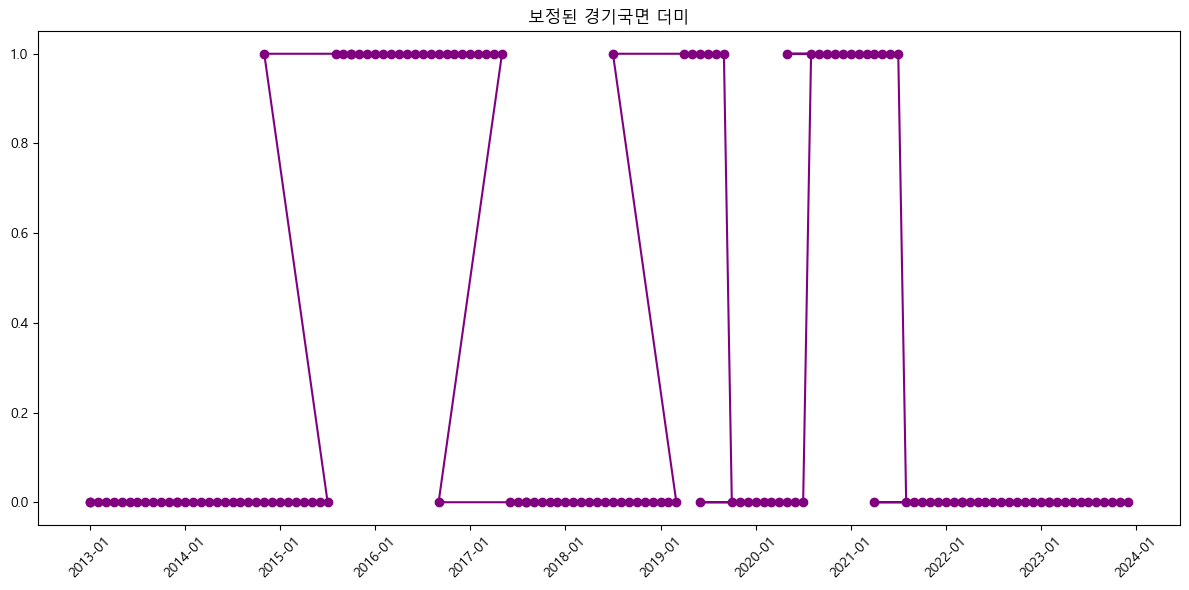

In [69]:
# 복사본 만들기
dummy = df2['동행지수 더미 확정'].copy().values

# 튀는 값 제거 (앞뒤 동일한 값이면 중간 값을 보정)
for i in range(1, len(dummy)-1):
    if dummy[i-1] == dummy[i+1] and dummy[i] != dummy[i-1]:
        dummy[i] = dummy[i-1]

df2['더미_보정'] = dummy

import numpy as np
from itertools import groupby

# run-length encoding 방식으로 더미 값과 길이 추출
values = df2['동행지수 더미 확정'].values
corrected = []
min_length = 5  # 최소 지속기간 설정

for val, group in groupby(values):
    group_list = list(group)
    if len(group_list) < min_length:
        corrected.extend([1-val] * len(group_list))  # 반전
    else:
        corrected.extend([val] * len(group_list))

df2['더미_보정'] = corrected

plt.figure(figsize=(12, 6))
plt.plot(df2['시점'], df2['더미_보정'], marker='o', linestyle='-', color='purple')
plt.title('보정된 경기국면 더미')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(ticks=range(0, len(df2), 12), labels=df2['시점'][::12], rotation=45)
plt.tight_layout()

/var/folders/nl/zhz_vs1n51jb5xv7292gp4d00000gn/T/ipykernel_46905/4018736764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(0, inplace=True)
/var/folders/nl/zhz_vs1n51jb5xv7292gp4d00000gn/T/ipykernel_46905/4018736764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['동행종합지수 전월비(%).2'] = df_1['동행종합지수 전월비(%).2'].apply(lambda x: float(x))
/var/folders/nl/zhz_vs1n51jb5xv7292gp4d00000gn/T/ipykernel_46905/4018736764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

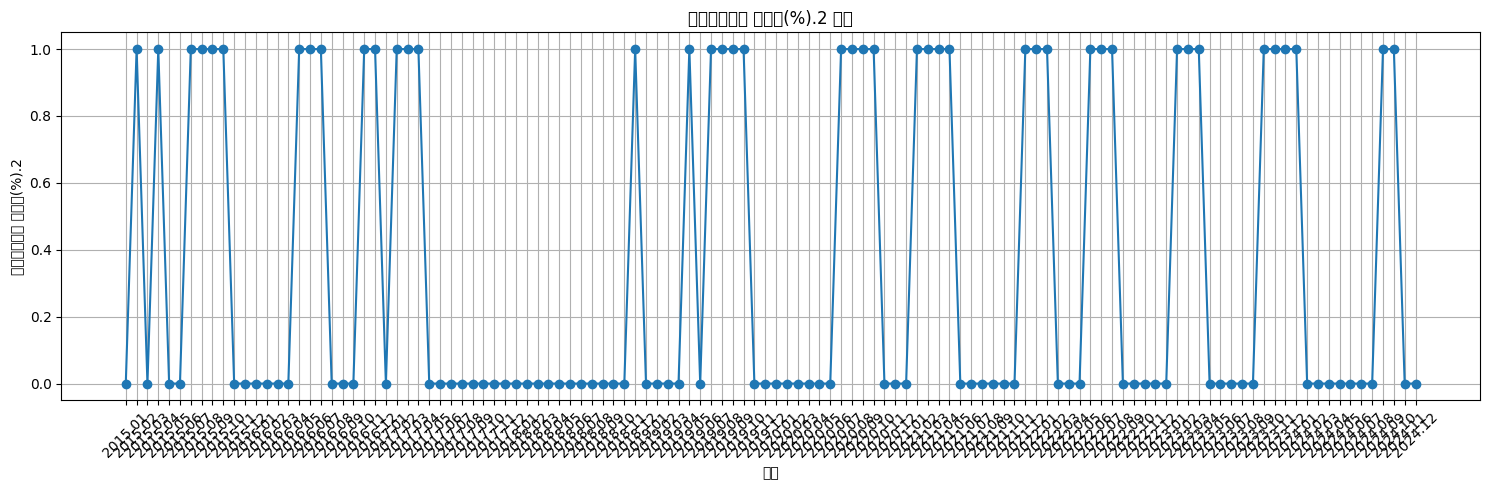

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/경기종합지수_증감율.csv")
df_1 = df[['시점', '동행종합지수 전월비(%).2']]
df_1.drop(0, inplace=True)
df_1['동행종합지수 전월비(%).2'] = df_1['동행종합지수 전월비(%).2'].apply(lambda x: float(x))
df_1['동행종합지수 전월비(%).2'] = df_1['동행종합지수 전월비(%).2'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(15, 5))
plt.plot(df_1['시점'], df_1['동행종합지수 전월비(%).2'], marker='o')
plt.xlabel('시점')
plt.ylabel('동행종합지수 전월비(%).2')
plt.title('동행종합지수 전월비(%).2 추이')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()